# Importing Libraries

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading The Data

In [38]:
sales = pd.read_excel('sales-pipeline.xlsx')
sales.head(10)

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256
5,Stanredtax,2V848WZD,Lajuana Vencill,lajuana@piedpiper.com,candice@stanredtax.com,Won,MG Advanced,3180,2016-01-07,2016-01-31,24
6,Hatfan,PE84CX4O,Zane Levy,zane@piedpiper.com,tyron@hatfan.com,Won,GTX Basic,517,2016-01-08,2016-12-08,335
7,Y-corporation,GIUUTBXM,Kary Hendrixson,kary@piedpiper.com,rosanne@y-corporation.com,Won,GTXPro,5539,2016-01-10,2016-12-03,328
8,Gogozoom,C20AVXN7,Darcel Schlecht,darcel@piedpiper.com,salina@gogozoom.com,Won,GTXPro,4359,2016-01-10,2016-01-28,18
9,Kinnamplus,VR9NYBOV,Garret Kinder,garret@piedpiper.com,monte@kinnamplus.com,Won,MG Special,41,2016-01-11,2016-12-29,353


In [3]:
interx = pd.read_excel('interactions.xlsx')
interx.head()

,interactionID,fromEmailId,toEmailId,InteractionDate,InteractionType(Call/Email/SMS),Extracted Interaction Text
0,8842411,gladys@piedpiper.com,kristle@dontechi.com,2016-01-04,Call,I thoroughly enjoyed your presentation yesterd...
1,8015509,donn@piedpiper.com,orpha@umbrellacorporation.com,2016-01-04,Call,speaking with you and your staff will be a tre...
2,5976842,kary@piedpiper.com,claribel@goodsilron.com,2016-01-04,Email,"However, I am unable to join because of my fam..."
3,1471794,boris@piedpiper.com,gordon@scotfind.com,2016-01-04,Call,We are extremely sorry to inform you that we h...
4,4330320,darcel@piedpiper.com,benny@treequote.com,2016-01-04,Call,I don't think it's possible for me to meet you


# Data Analysis and Visualization

In [4]:
# No. of rows in sales
rows = sales.shape[0]
print('No. of rows in sales:', rows)

No. of rows in sales: 8800


In [5]:
# No. of rows in interactions
rows = interx.shape[0]
print('No. of rows in interactions:', rows)

No. of rows in interactions: 316776


In [6]:
# Distribution of Deal Stages

Won            4238
Lost           2473
In Progress    2089
Name: Deal_Stage, dtype: int64


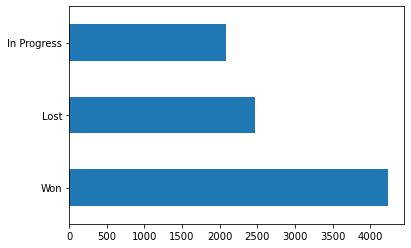

In [12]:
sales['Deal_Stage'].value_counts().plot(kind='barh')
print(sales['Deal_Stage'].value_counts())

# Preparation of Final Dataset

In [32]:
# Function to get all interactions among 2 people between a given time period

def get_interactions(from_, to, start, end):
    texts = interx[(interx['fromEmailId']==from_) & (interx['toEmailId']==to) & \
                   (interx['InteractionDate']<=end) & (interx['InteractionDate']>=start)]['Extracted Interaction Text']
    texts = ''.join(list(texts))
    return texts

In [59]:
# Sample

row = sales.iloc[0]
#print(row)
from_ = row['SalesAgentEmailID']
to = row['ContactEmailID']
start = row['Created Date']
end = row['Close Date']
text = get_interactions(from_, to, start, end).strip()
print('Text:\n\n',text, '\n\n')
print('Size: ', len(text.split()))

Text:

 We are writing from GHF regarding the previous discussions that we had about the business proposal that your company sent us. We are happy to let you know that GHF accepted your business proposal. Thank you for offering us the opportunity of working with you. We are looking forward to work with your company.I had asked you to send the progress on the project by the end of last week but I still haven't got it. Do send us the report asap. We will not be able to move forward with the deal unless we get it verified by our CEO. I wish to commend your receptionist, Jany Dan, for the way she handled our problem yesterday. She was courteous and friendly as she made half a dozen telephone calls on my behalf, not giving up until she had traced the missing shipment. Ms. Dan is an asset to your organization and is part of the reason I look forward to doing business with you again in the future.I need to cancel the appointment I made to you on January 29, at 9:00 a.m.Congratulations! Your h

In [47]:
# No. of interactions where from and to are same

count = len(interx[interx['fromEmailId'] == interx['toEmailId']])
print('Number of interactions with themselves: ',count)

Number of interactions with themselves:  158388


In [56]:
# Creating the final dataset

final = sales.copy()
final['Interactions'] = None
final['Word Count'] = None
for i in range(sales.shape[0]):
    row = sales.iloc[i]
    from_ = row['SalesAgentEmailID']
    to = row['ContactEmailID']
    start = row['Created Date']
    end = row['Close Date']
    text = get_interactions(from_, to, start, end).strip()
    length = len(text.split())
    final.iat[i, -2] = text
    final.iat[i, -1] = length
final.head()

,Account,Opportunity_ID,Sales_Agent,SalesAgentEmailID,ContactEmailID,Deal_Stage,Product,Close_Value,Created Date,Close Date,DateDiff,Interactions,Word Count
0,Konex,3KR50X38,Corliss Cosme,corliss@piedpiper.com,delila@konex.com,Won,GTX Plus Basic,1255,2016-01-04,2016-05-24,141,We are writing from GHF regarding the previous...,1083
1,Finjob,YFS5KLJJ,Rosalina Dieter,rosalina@piedpiper.com,belinda@finjob.com,Won,MG Special,45,2016-01-04,2016-11-02,303,I want to thank you for the excellent service ...,218
2,Kinnamplus,N0ONCYVZ,Donn Cantrell,donn@piedpiper.com,monte@kinnamplus.com,Lost,MG Special,1054,2016-01-06,2016-12-07,336,I am honored that you would choose me to fill ...,507
3,Genco Pura Olive Oil Company,IBEUTCSW,James Ascencio,james@piedpiper.com,karole@gencopuraoliveoilcompany.com,In Progress,MG Advanced,1054,2016-01-06,2016-09-11,249,I appreciate your contribution to Morgan Stanl...,327
4,Initech,G8AO5FA2,Wilburn Farren,wilburn@piedpiper.com,alejandro@initech.com,Lost,MG Advanced,517,2016-01-06,2016-09-18,256,Please accept my regrets in resigning from my ...,139


In [63]:
#final.to_csv('sales+interactions.csv')
final.to_excel('sales+interactions.xlsx')

In [67]:
# Number of empty interactions

count = len(final[final['Word Count']==0])
print('No. of empty interactions: ', count)
print('Percentage: ', count/final.shape[0]*100)

No. of empty interactions:  315
Percentage:  3.5795454545454546


In [69]:
# Average Word Count of interactions

mean = np.mean(list(final['Word Count']))
print('Average: ', mean)

Average:  782.3080681818182
